In [203]:
from tkinter import messagebox as msg
from tkinter import *
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [204]:
dataset = pd.read_csv('Chennai_house_univariate_train.csv')

In [205]:
dataset.isna().sum()

Size     0
Price    0
dtype: int64

In [206]:
dataset.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


In [207]:
X = dataset['Size']
y = dataset['Price']

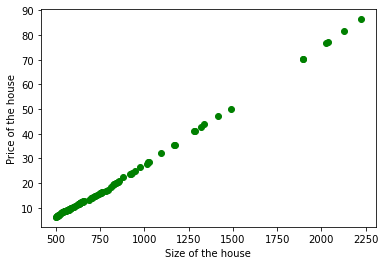

In [208]:
plt.scatter(X,y,marker='o',c='g')
plt.xlabel('Size of the house')
plt.ylabel('Price of the house')
plt.xticks()
plt.yticks()
plt.show()

In [209]:
normalize = Normalizer()

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [211]:
linreg = LinearRegression()

In [212]:
X_train.shape

(77,)

In [213]:
X_train = np.asarray(X_train)
X_train = X_train.reshape(-1,1)
X_train.shape
#----------------------------------------------------------------#
X_test = np.asarray(X_test)
X_test = X_test.reshape(-1,1)
X_test.shape

(20, 1)

In [214]:
linreg.fit(X_train,y_train)

LinearRegression()

In [215]:
y_pred = linreg.predict(X_test)

In [216]:
print('The accuracy is : {} %'.format(100 * linreg.score(X_test,y_test)))
print('The Mean Squared error is (MSE): {} '.format(mean_squared_error(y_test,y_pred)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('The Root Mean Squared Error is (RMSE): {}'.format(rmse))

The accuracy is : 99.7927298891489 %
The Mean Squared error is (MSE): 0.5594684576919525 
The Root Mean Squared Error is (RMSE): 0.7479762413953751


Plotting the line in the graph.

In [217]:
prediciton_space = np.linspace(min(X_train),max(X_train)).reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

[]

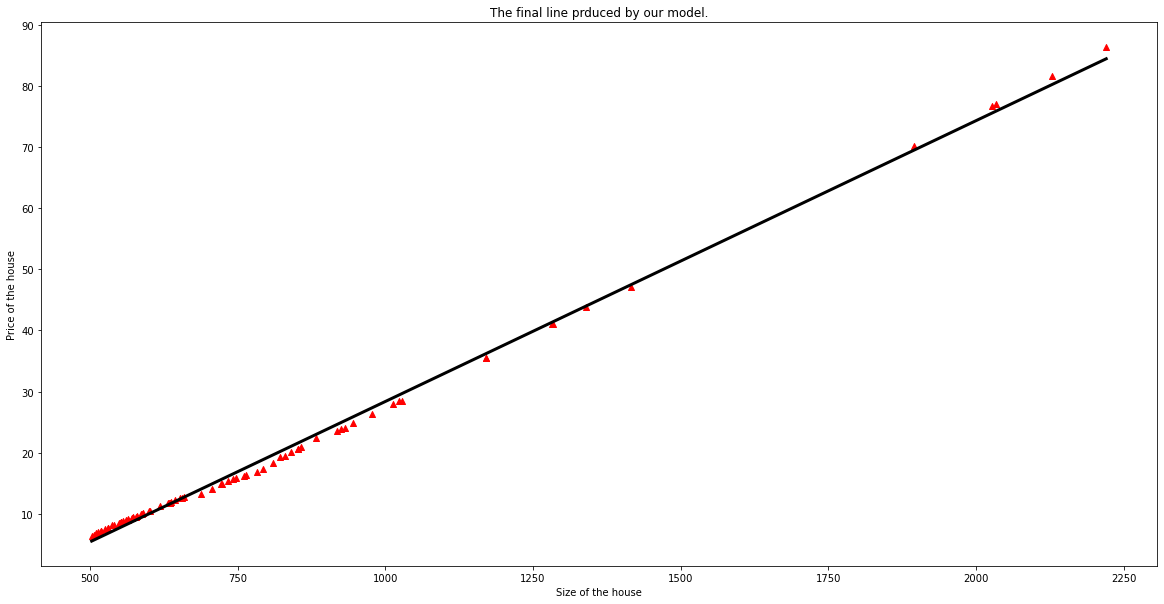

In [218]:
fig = plt.figure(1,figsize=(20,10))
plt.title('The final line prduced by our model.')
plt.scatter(X_train,y_train,marker='^',c='red')
plt.plot(prediciton_space,linreg.predict(prediciton_space),c='black',linewidth=3)
plt.xlabel('Size of the house')
plt.ylabel('Price of the house')
plt.plot()

In [219]:
print('The coefficient of our equation is : {}'.format(linreg.coef_))
print('The intercept is :{}'.format(linreg.intercept_))

The coefficient of our equation is : [0.04595651]
The intercept is :-17.57835238737694


In [220]:
class Abc(Frame):
    def __init__(self,master):
        super().__init__(master)
        self.number1 = StringVar() 
        self.l1 = Label(self,text='Enter the size of the house:').grid(row=0,column=0)
        
        self.e1 = Entry(self,bg='light gray',fg='blue',textvariable=self.number1)
        self.e1.grid(row=0,column=1)
        
        self.b1 = Button(self,text='Predict',command=self.predict).grid(row=1,column=1)
        #self.rowconfigure(index=0,pad=20)
        self.pack()
        
    def predict(self):
        size_str = self.e1.get()
        size_flt =float(size_str)
        prediction = linreg.predict([[size_flt]])
        msg.showinfo('Prediction',str(prediction))
            
root = Tk()
m = Abc(root)
root.geometry('450x450')
root.mainloop()        